In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('MCMods.csv')

In [3]:
df['downloads'] = df['downloads'].str.replace(',','').astype('int')

In [4]:
df['latest_release'] = pd.to_datetime(df['latest_release'], format='%b %d, %Y')
df['created'] = pd.to_datetime(df['created'], format='%b %d, %Y')

## Which mods is most downloads among players

In [12]:
df_sorted = df.sort_values(by='downloads', ascending=False)

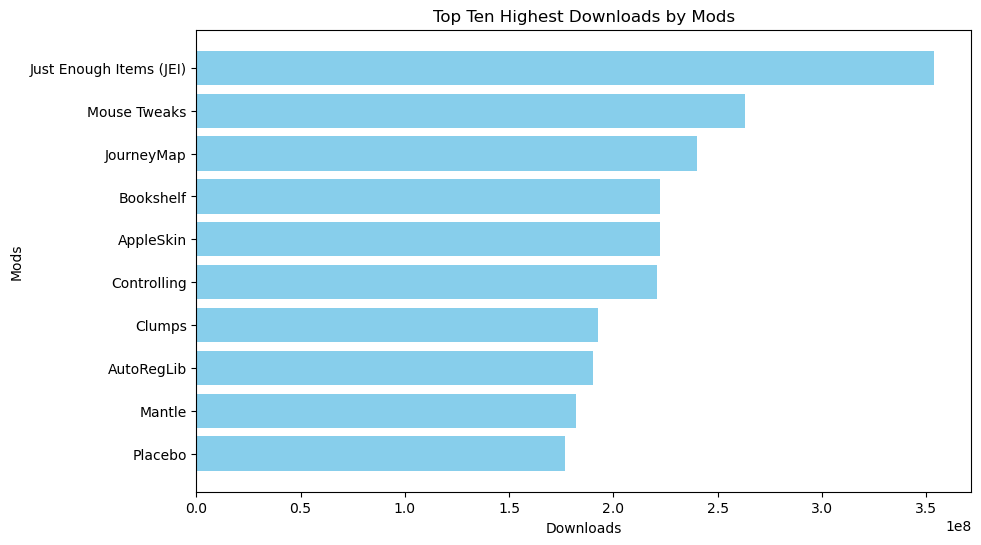

In [13]:
plt.figure(figsize=(10, 6))
plt.barh(df_sorted.head(10)['name'], df_sorted.head(10)['downloads'], color='skyblue')
plt.xlabel('Downloads')
plt.ylabel('Mods')
plt.title('Top Ten Highest Downloads by Mods')
plt.gca().invert_yaxis()
plt.show()

## Which category of mods is most popular among player

In [8]:
df2 = df.copy()

In [9]:
df2['categories'] = df2['categories'].str.split(' \| ')
df2_exploded = df2.explode('categories')
cate_downloads = df2_exploded.groupby('categories')['downloads'].sum().reset_index()
cate_downloads_sorted = cate_downloads.sort_values(by='downloads', ascending=False, ignore_index=True)

<>:1: SyntaxWarning: invalid escape sequence '\|'
<>:1: SyntaxWarning: invalid escape sequence '\|'
C:\Users\user\AppData\Local\Temp\ipykernel_15596\1080849801.py:1: SyntaxWarning: invalid escape sequence '\|'
  df2['categories'] = df2['categories'].str.split(' \| ')


C:\Users\user\AppData\Local\Temp\ipykernel_15596\1064845695.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{int(x/1e6)}m' for x in plt.gca().get_xticks()])


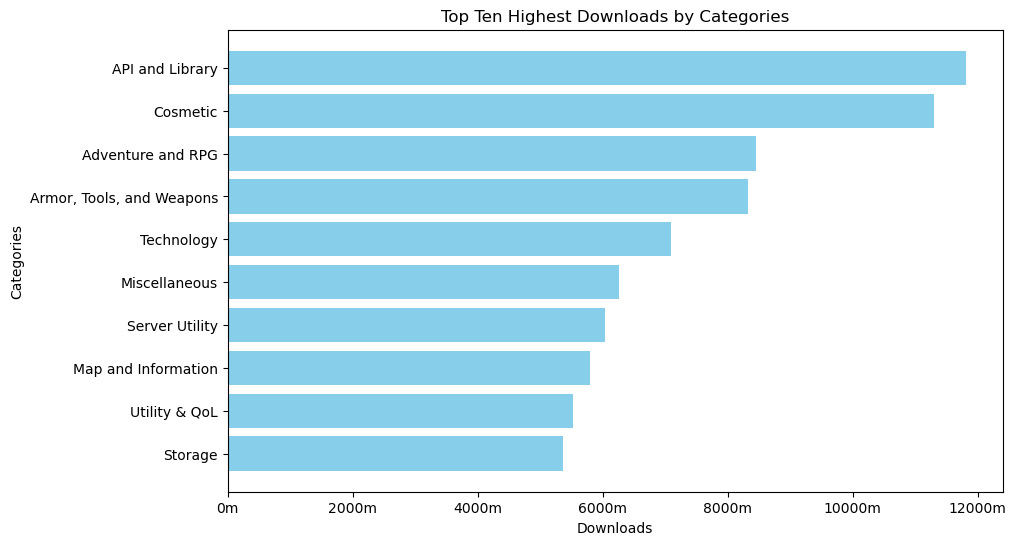

In [10]:
plt.figure(figsize=(10, 6))
plt.barh(cate_downloads_sorted.head(10)['categories'], cate_downloads_sorted.head(10)['downloads'], color='skyblue')
plt.xlabel('Downloads')
plt.ylabel('Categories')
plt.title('Top Ten Highest Downloads by Categories')
plt.gca().set_xticklabels([f'{int(x/1e6)}m' for x in plt.gca().get_xticks()])
plt.gca().invert_yaxis()
plt.show()

In [14]:
df3 = df.copy()

In [15]:
df3['mod_loaders'] = df3['mod_loaders'].str.split(', ')
df3_exploded = df3.explode('mod_loaders')
loader_downloads = df3_exploded['mod_loaders'].value_counts()
df3_sum = pd.DataFrame(loader_downloads).reset_index()

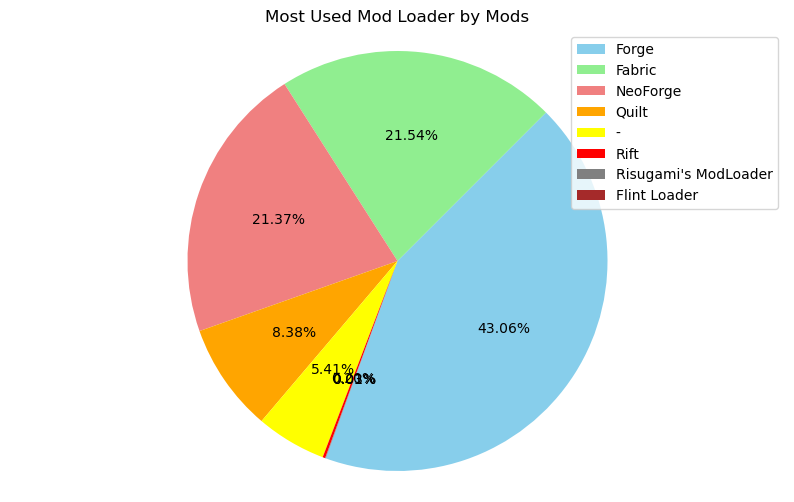

In [16]:
plt.figure(figsize=(10, 6))

plt.pie(df3_sum['count'], autopct='%1.2f%%', startangle=250, colors=['skyblue', 'lightgreen', 'lightcoral', 'orange','yellow','red','grey','brown'],labeldistance=1.2)

plt.title('Most Used Mod Loader by Mods')

plt.axis('equal')

plt.legend(df3_sum['mod_loaders'])

plt.show()

In [15]:
df4 = df.copy()

In [17]:
author_downloads = df4.groupby('author')['downloads'].sum().reset_index()
author_downloads['mods_qty'] = df4['author'].value_counts().values
author_sorted = author_downloads.sort_values(by='downloads', ascending=False, ignore_index=True)

C:\Users\user\AppData\Local\Temp\ipykernel_12684\29040996.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels([f'{int(x/1e6)}m' for x in axes[0].get_xticks()])


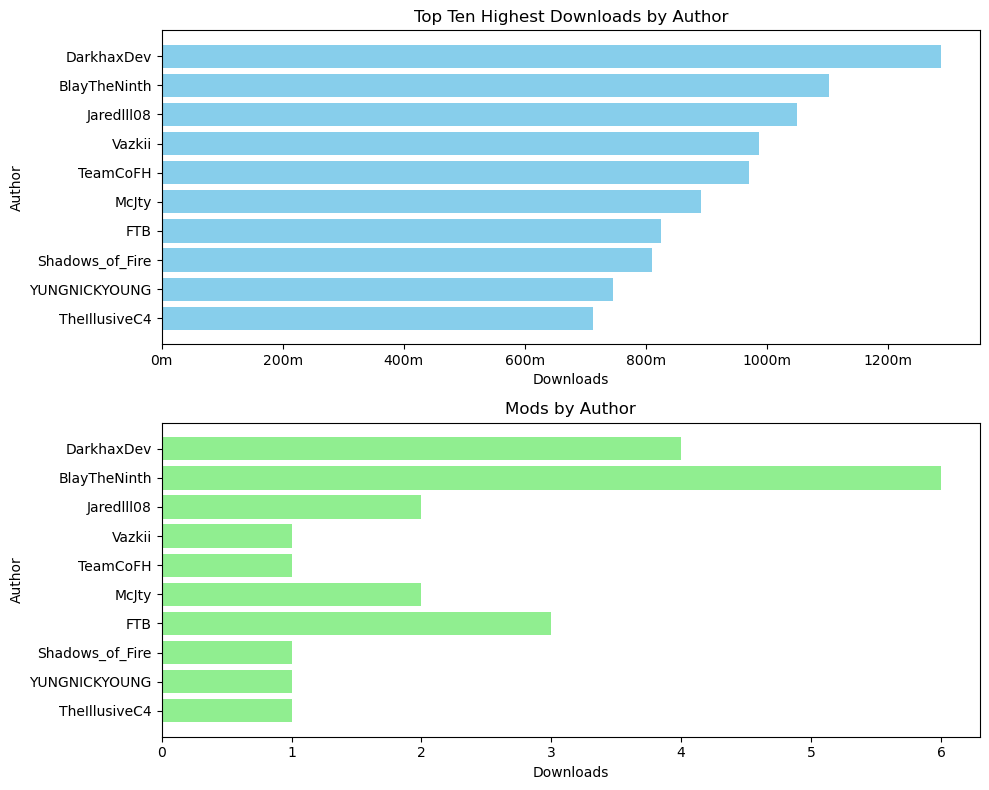

In [22]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].barh(author_sorted.head(10)['author'], author_sorted.head(10)['downloads'], color='skyblue')
axes[0].set_xlabel('Downloads')
axes[0].set_ylabel('Author')
axes[0].set_title('Top Ten Highest Downloads by Author')
axes[0].set_xticklabels([f'{int(x/1e6)}m' for x in axes[0].get_xticks()])
axes[0].invert_yaxis() 

axes[1].barh(author_sorted.head(10)['author'], author_sorted.head(10)['mods_qty'], color='lightgreen')
axes[1].set_xlabel('Downloads')
axes[1].set_ylabel('Author')
axes[1].set_title('Mods by Author')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

In [18]:
df5 = df.copy()

In [19]:
created_date_sorted = df5.sort_values(by='created', ascending=True, ignore_index=True)
created_date_sorted['year'] = df5['created'].dt.year
df5_grouped = created_date_sorted.groupby('year')['downloads'].sum().reset_index()
df5_grouped['mods_qty'] = created_date_sorted['year'].value_counts().values

C:\Users\user\AppData\Local\Temp\ipykernel_15596\785388398.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels([f'{int(x/1e6)}m' for x in axes[0].get_xticks()])


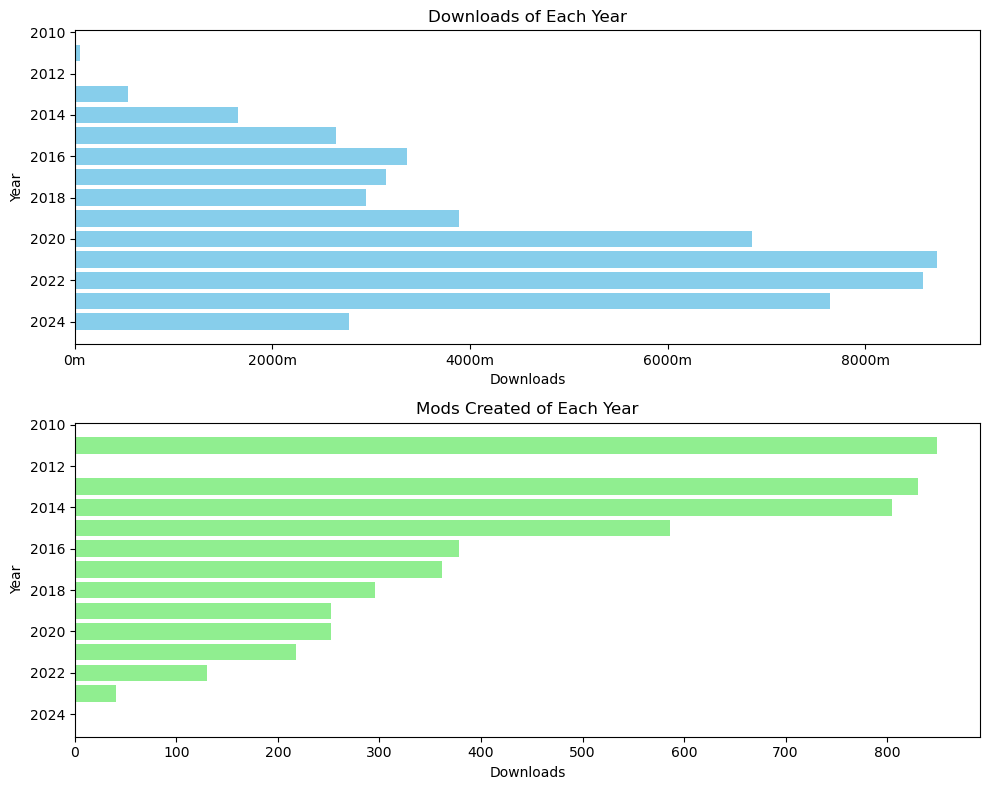

In [23]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].barh(df5_grouped['year'], df5_grouped['downloads'], color='skyblue')
axes[0].set_xlabel('Downloads')
axes[0].set_ylabel('Year')
axes[0].set_title('Downloads of Each Year')
axes[0].set_xticklabels([f'{int(x/1e6)}m' for x in axes[0].get_xticks()])
axes[0].invert_yaxis() 

axes[1].barh(df5_grouped['year'], df5_grouped['mods_qty'], color='lightgreen')
axes[1].set_xlabel('Downloads')
axes[1].set_ylabel('Year')
axes[1].set_title('Mods Created of Each Year')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()